# 一、提出问题

有哪些因素会让船上的人生还率更高？

# 二、提出猜测

对于上面提出的问题，提出了如下可能的7个因素：Pclass、Sex、Age、SibSp、Parch、Fare、Cabin

# 三、数据处理 & 分析

下面将分别对于上面的8个因素进行因果分析。

Populating the interactive namespace from numpy and matplotlib
891


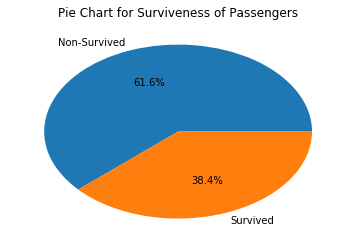

In [50]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('./titanic-data.csv')

# 总乘客数
num = len(data)
print num

# 整体幸存率
by_Survived = data.groupby(['Survived'])['Survived'].count()
plt.pie(by_Survived, labels = ['Non-Survived','Survived'], autopct='%.1f%%')
plt.title('Pie Chart for Surviveness of Passengers')

# 空数据
null = data.isnull()

# 绘制不同因子的对乘客幸存率的影响条形图
def render_bar_plot(factor):
    survived_value_counts = data.groupby(factor)['Survived'].value_counts()
    survived_count = data.groupby(factor)['Survived'].count()
    survived_ratio = survived_value_counts / survived_count
    
    print survived_ratio
    survived_value_counts.unstack().plot(kind='bar',stacked=False, title="Counts of Passengers by" + factor)
    survived_ratio.unstack().plot(kind='bar',stacked=True, title="Survied Ratio by " + factor)

### 0. 数据预处理

经过分析可得出：Cabin缺失数据太多，直接删除Cabin列数据；Age缺失数据较多，采取填充值的方法，并且选用中位数填充。

In [51]:
print len(null[null['Pclass'] == True])
print len(null[null['Sex'] == True])
print len(null[null['Age'] == True])
print len(null[null['SibSp'] == True])
print len(null[null['Parch'] == True])
print len(null[null['Fare'] == True])
print len(null[null['Cabin'] == True])

del data['Cabin']
data = data.fillna(data.median()['Age'])

0
0
177
0
0
0
687


### 1. 乘客等级（Pclass）

经过对数据进行观察，我发现乘客分为3个等级：1、2、3；然后计算出每个等级的幸存者数量和幸存率分别为：0.629630、0.472826、0.242363。

由此可得出初步结论：**乘客等级与幸存率呈正相关性**。代码如下。

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64


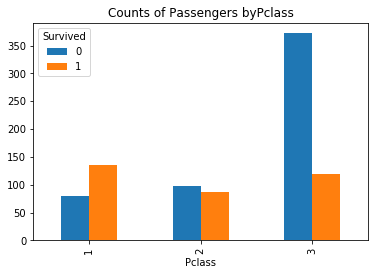

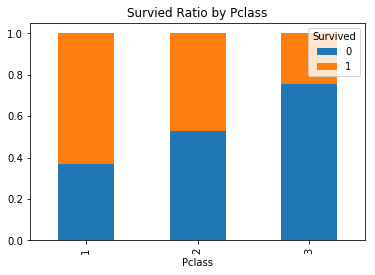

In [52]:
render_bar_plot('Pclass')

### 2. 性别（Sex）

分别计算出男女的幸存率为：0.188908、0.742038。

由此可得出初步结论：**女性的幸存率比男性大**。代码如下。

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64


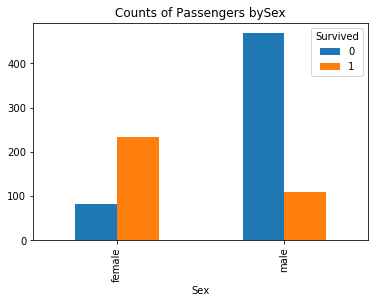

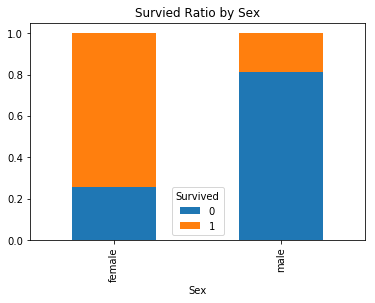

In [53]:
render_bar_plot('Sex')

### 3. 年龄（Age）

分析可得，所有乘客的最大年龄是80岁，最小年龄是0.42岁。以10作为组距，将所有乘客进行分组。可以得到各个年龄段的乘客数，和幸存率，如下图。
得到(0, 10]、(10, 20]、(20, 30]、(30, 40]、(40, 50]、(50, 60]、(60, 70]、(70, 80]年龄段的乘客的存活率分别为：
0.593750、0.382609、0.334152、0.445161、0.383721、0.404762、0.235294、0.2

Age_group  Survived
(0, 10]    1           0.593750
           0           0.406250
(10, 20]   0           0.617391
           1           0.382609
(20, 30]   0           0.665848
           1           0.334152
(30, 40]   0           0.554839
           1           0.445161
(40, 50]   0           0.616279
           1           0.383721
(50, 60]   0           0.595238
           1           0.404762
(60, 70]   0           0.764706
           1           0.235294
(70, 80]   0           0.800000
           1           0.200000
Name: Survived, dtype: float64


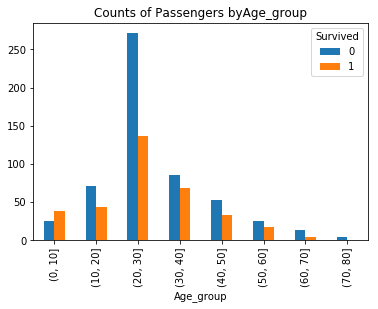

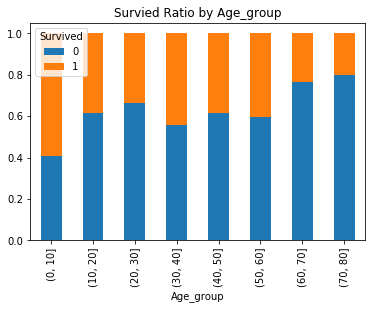

In [55]:
bins = np.arange(0, 90, 10)
data['Age_group'] = pd.cut(data['Age'], bins)

render_bar_plot('Age_group')

### 4.  堂兄弟/妹个数（SibSp）

分析可得，所有乘客中，堂兄弟/妹个数最多的有8个，最少的有0个。分别计算有0~8个堂兄弟/妹的乘客的幸存率为：
0.345395、0.535885、0.464286、0.25、0.166667、0、NaN、NaN、0

由此可得出初步结论：**堂兄弟/妹个数与幸存率呈负相关性**。

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: Survived, dtype: float64


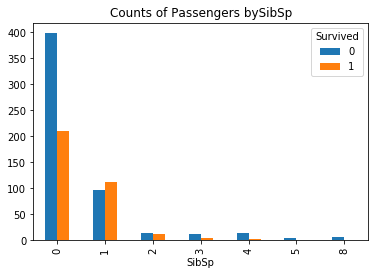

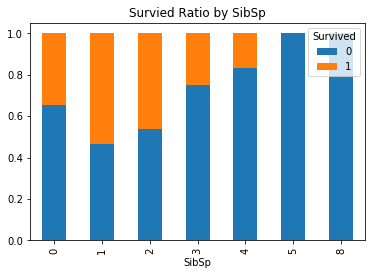

In [56]:
render_bar_plot('SibSp')

### 5. 父母与小孩个数（Parch）

分析可得，所有乘客中，父母与小孩个数最多的有6个，最少的有0个。分别计算有0~6个父母与小孩的乘客的幸存率为：
0.343658、0.550847、0.5、0.6、0、0.2、0

综合考虑有不同父母与小孩个数的乘客的数量，和幸存率，可得出初步结论：**父母和小孩个数，与幸存率呈正相关性**。代码如下。

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
Parch  Survived
0      0           0.656342
       1           0.343658
1      1           0.550847
       0           0.449153
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: Survived, dtype: float64


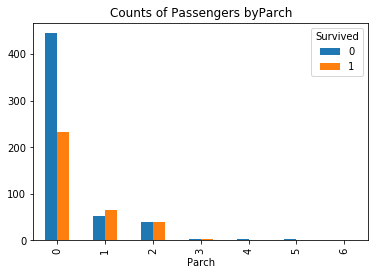

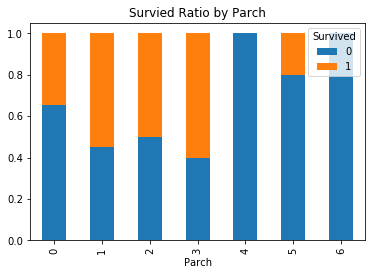

In [57]:
print data['Parch'].describe()

render_bar_plot('Parch')

### 6. 票价（Fare）

从下图的箱线图，可得出初步结论：**票价与幸存率呈正相关性**。

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


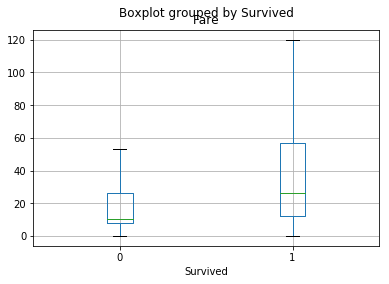

In [58]:
print data['Fare'].describe()

data.boxplot('Fare', by='Survived',showfliers=False)

### 7. 客舱（Cabin）

客舱数据丢失太多，**无法判断客舱与幸存率之间的关系**。

# 四、结论

总结上面提出的8个可能因素与幸存率之间的关系如下：
1. 乘客等级与幸存率呈正相关性
2. 女性的幸存率比男性大
3. 幸存率与年龄没有显著关系
4. 堂兄弟/妹个数与幸存率呈负相关性
5. 父母和小孩个数，与幸存率呈正相关性
6. 票价与幸存率呈正相关性
7. 无法判断客舱与幸存率之间的关系

所以，跟幸存率相关的因素有：**乘客等级、性别、堂兄弟/妹个数、父母和小孩个数、票价**。

# 五、缺陷与不足

1. 本次报告中仅使用了**探索性分析**，所以只能得出**相关关系**。如果要探索某变量是否对存活率有显著影响，则需要执行**t检测**等统计检验方法；
2. 对于数据集中缺失值，比如"Age"有接近20%的缺失数据，本报告采取了用中位数填充的做法，但是这种做法具有一定的局限性，导致分析结果不够准确。可以改进的一个做法是，根据该词条数据的其他信息，来对乘客的年龄进行预测，比如：乘客的称呼
3. 本次报告分析了7个变量因素，但是每个变量都是单独分析的，而未考虑到各个因素之间的相互影响；

# 参考资料

[1] http://blog.csdn.net/u013457382/article/details/50827454

[2] https://zhuanlan.zhihu.com/p/25128216

[3] 《Python基础教程》
